In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from fooof import FOOOF
from lagged_coherence import *

In [2]:
f=h5py.File('../data/epochs_target_on_session0920.mat', 'r')
data=np.array(f['target_on_epoch']).T


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 8 - 60 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

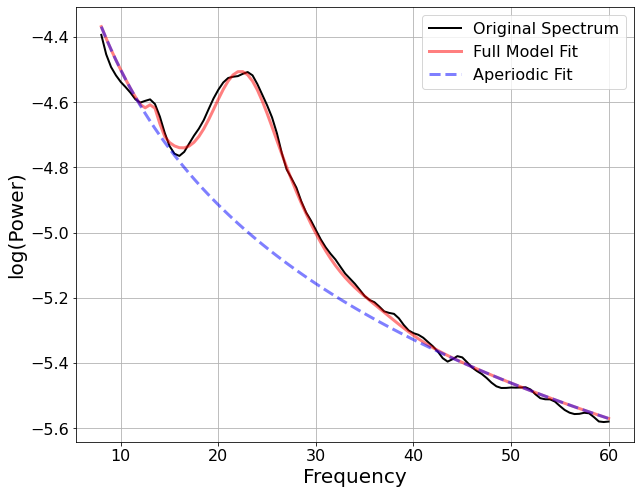

In [3]:
freqs=np.linspace(5,100,100)
f,psd=scipy.signal.welch(data, fs=1000, window='hann', 
                       nperseg=1000, noverlap=500, nfft=2000, detrend='constant', 
                       return_onesided=True, scaling='density', axis=- 1, average='mean')
f_idx=(f>=freqs[0]) & (f<=freqs[-1])
f=f[f_idx]
psd=np.mean(psd[:,f_idx],axis=0)

fm=FOOOF(peak_threshold=.9)
fm.report(f,psd,[8,60])

In [4]:
freqs=np.linspace(5,100,100)
lags=np.linspace(1,7,50)
lc_classic=lagged_coherence(data, freqs, lags, 1000)
lc_hilbert=lagged_hilbert_coherence(data, freqs, lags, 1000)

/home/bonaiuto/miniconda3/envs/new_lc/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/bonaiuto/miniconda3/envs/new_lc/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/bonaiuto/miniconda3/envs/new_lc/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/bonaiuto/miniconda3/envs/new_lc/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/hom

/home/bonaiuto/miniconda3/envs/new_lc/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/bonaiuto/miniconda3/envs/new_lc/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/bonaiuto/miniconda3/envs/new_lc/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/bonaiuto/miniconda3/envs/new_lc/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/hom

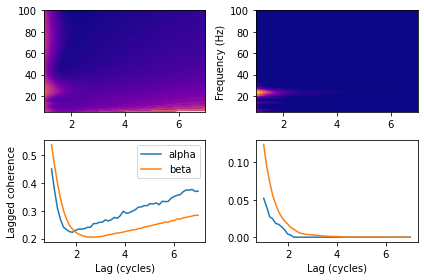

In [5]:
low_frange=np.where((freqs>=12) & (freqs<=14.5))[0]
high_frange=np.where((freqs>=16) & (freqs<=34))[0]

plt.figure()
plt.subplot(2,2,1)
i1=plt.imshow(np.nanmean(lc_classic,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.subplot(2,2,2)
i1=plt.imshow(np.nanmean(lc_hilbert,axis=0), aspect='auto', cmap='plasma', 
              extent=[lags[0], lags[-1], freqs[0], freqs[-1]], 
              origin='lower')
plt.ylabel('Frequency (Hz)')
plt.subplot(2,2,3)
plt.plot(lags,np.nanmean(np.nanmean(lc_classic[:,low_frange,:],axis=1),axis=0),label='alpha')
plt.plot(lags,np.nanmean(np.nanmean(lc_classic[:,high_frange,:],axis=1),axis=0),label='beta')
plt.xlabel('Lag (cycles)')
plt.ylabel('Lagged coherence')
plt.legend()
plt.subplot(2,2,4)
plt.plot(lags,np.nanmean(np.nanmean(lc_hilbert[:,low_frange,:],axis=1),axis=0),label='alpha')
plt.plot(lags,np.nanmean(np.nanmean(lc_hilbert[:,high_frange,:],axis=1),axis=0),label='beta')
plt.xlabel('Lag (cycles)')
plt.tight_layout()

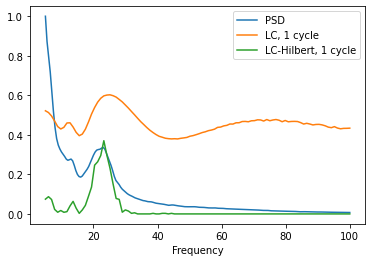

In [6]:
plt.plot(f,psd/np.max(psd),label='PSD')
plt.plot(freqs,np.nanmean(lc_classic[:,:,0],axis=0),label='LC, 1 cycle')
plt.plot(freqs,np.nanmean(lc_hilbert[:,:,0],axis=0),label='LC-Hilbert, 1 cycle')
plt.xlabel('Frequency')
plt.legend()